In [1]:
# Importando las librerias básicas
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargamos datos y creamos una copia
df=pd.read_csv("creditcard.csv")
dfc= df.copy()

In [4]:
# Mostrar los primeros 5 datos
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
tag=list(df.columns[0:-1])
df.columns[0:-1]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# Original Data

In [9]:
X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])

In [12]:
X , y = shuffle(X,y,random_state = 0)

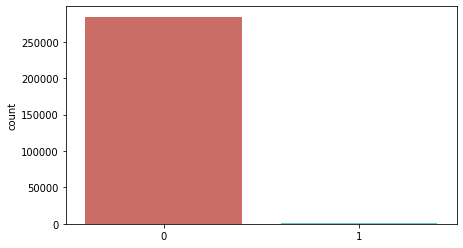

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(y ,palette="hls")
plt.show()

In [49]:
dX=pd.DataFrame(X)
dX.columns=tag
dX.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.190096e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.259980e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.365090e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.104537e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.011938e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.496335e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.688608e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.159138e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.388115e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [21]:
from sklearn.preprocessing import RobustScaler

# Under Sampling

In [14]:
under_X , under_y = RandomUnderSampler(random_state=0).fit_resample(X,y)
under_X , under_y = shuffle(under_X,under_y,random_state = 0)

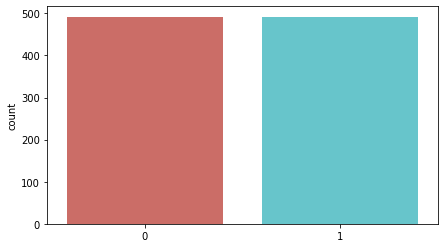

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(under_y ,palette="hls")
plt.show()

In [53]:
duX=pd.DataFrame(under_X)
duX.columns=tag
duX.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,984.0,87909.290650,48151.789769,241.000000,45423.000000,82526.000000,134120.500000,172682.000000
V1,984.0,-2.383996,5.481224,-30.552380,-2.859468,-0.797862,0.949687,2.390597
V2,984.0,1.856619,3.638948,-9.305303,-0.133541,1.017917,2.833075,22.057729
V3,984.0,-3.481656,6.226845,-31.103685,-5.074851,-1.316080,0.305456,3.682205
V4,984.0,2.280692,3.190174,-3.630980,-0.163509,1.319124,4.235631,12.114672
V5,984.0,-1.542804,4.216734,-22.105532,-1.773937,-0.409704,0.528765,11.095089
V6,984.0,-0.725406,1.732677,-6.406267,-1.587624,-0.676062,0.014962,6.474115
V7,984.0,-2.764532,5.860398,-43.557242,-3.078361,-0.587899,0.282261,6.240401
V8,984.0,0.289360,4.893814,-41.044261,-0.202703,0.155329,0.875527,20.007208
V9,984.0,-1.333015,2.296947,-13.434066,-2.324444,-0.765544,0.164172,5.917176


# Over Samping (Smothe)

In [13]:
over_X , over_y = SMOTE().fit_resample(X, y)
over_X , over_y = shuffle(over_X,over_y,random_state = 0)

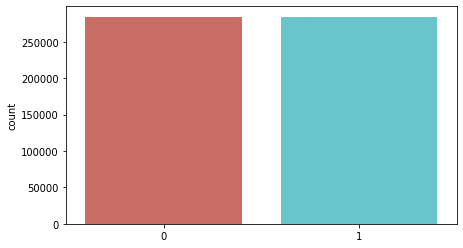

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(over_y ,palette="hls")
plt.show()

In [52]:
doX=pd.DataFrame(over_X)
doX.columns=tag
doX.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,568630.0,87831.758750,48143.031232,0.000000,46064.241512,80310.500000,134752.721081,172792.000000
V1,568630.0,-2.480800,5.457927,-56.407510,-3.065379,-0.818818,0.822610,2.454930
V2,568630.0,1.917213,3.638490,-72.715728,-0.096852,1.018678,2.897949,22.057729
V3,568630.0,-3.653279,6.160968,-48.325589,-5.237083,-1.552018,0.266837,9.382558
V4,568630.0,2.329554,3.145921,-5.683171,-0.055192,1.483985,4.346945,16.875344
V5,568630.0,-1.629263,4.137255,-113.743307,-1.830516,-0.444178,0.430333,34.801666
V6,568630.0,-0.719369,1.707956,-26.160506,-1.552846,-0.694415,0.022373,73.301626
V7,568630.0,-2.931449,5.715497,-43.557242,-3.266402,-0.752185,0.186196,120.589494
V8,568630.0,0.277740,4.962304,-73.216718,-0.196048,0.169315,0.857046,20.007208
V9,568630.0,-1.332439,2.226305,-13.434066,-2.330960,-0.810087,0.078305,15.594995
